In [43]:
import pandas as pd
import numpy as np

In [44]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [45]:
df = pd.read_csv("insurance_revised.csv")

In [46]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,4,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [48]:
from sklearn.model_selection import train_test_split

## Random Forest

In [49]:
X = df[['age','sex','bmi','children','region','smoker']]
y = df['charges']
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))
print('R2:', metrics.r2_score(test_labels, predictions))

Mean Absolute Error: 2551.62 degrees.
Accuracy: 73.36 %.
MAE: 2551.615120945066
MSE: 22499064.873433407
RMSE: 4743.317918233334
R2: 0.8508920741304946


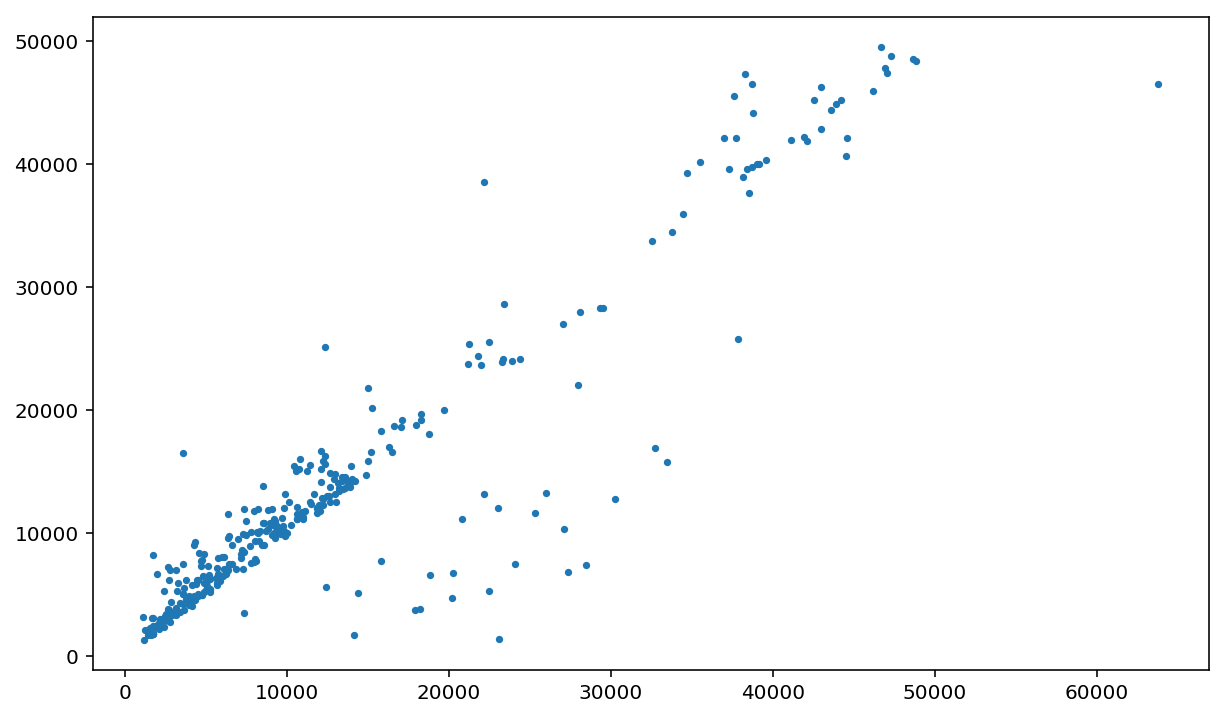

In [51]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.figure(figsize=(10,6))
plt.scatter(test_labels, predictions, s = 7)

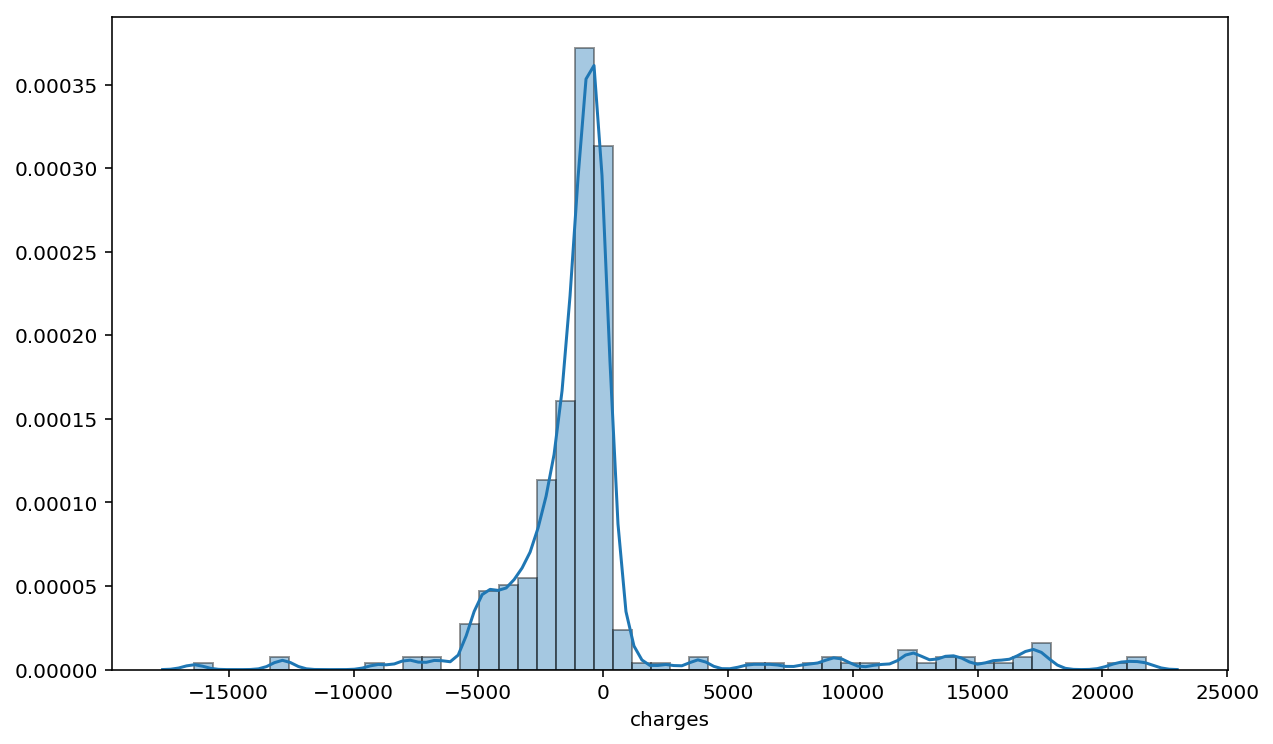

In [52]:
plt.figure(figsize=(10,6))
sns.distplot((test_labels-predictions),bins=50);

## Neural Networks

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(activation='relu',learning_rate='adaptive',alpha=0.55)
modelneuralnetwork = nn.fit(X_train, y_train)

y_train_prediction = nn.predict(X_train)
y_test_prediction = nn.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))
print('R2:', metrics.r2_score(y_test, y_test_prediction))

MAE: 7633.9715374651505
MSE: 153588232.1148519
RMSE: 12393.07194019513
R2: -0.017874425334502897


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


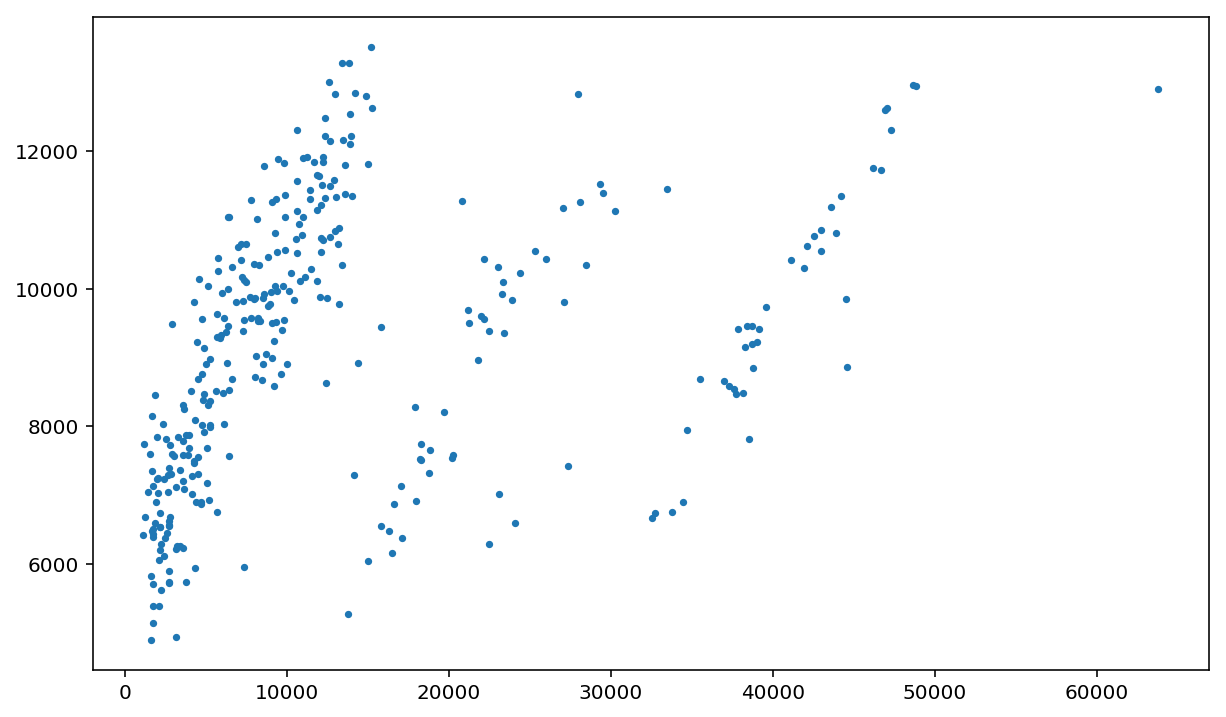

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_test_prediction, s = 7)

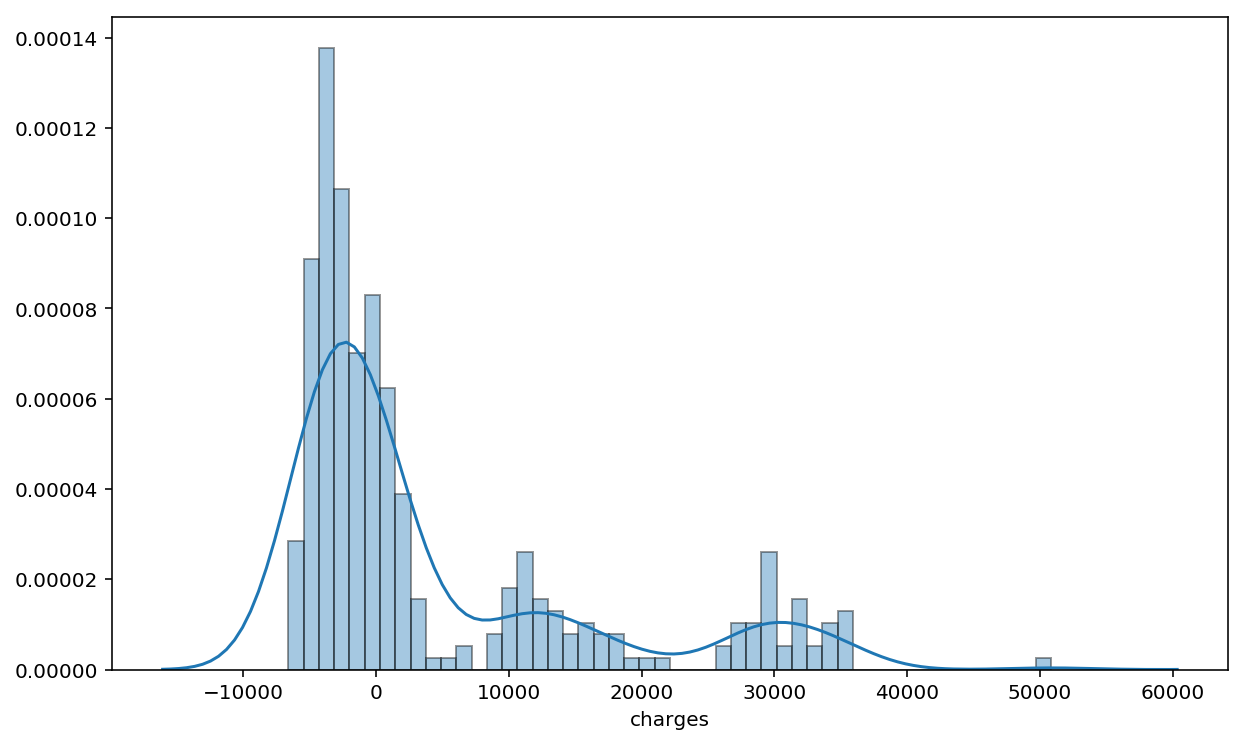

In [56]:
plt.figure(figsize=(10,6))
sns.distplot((y_test - y_test_prediction),bins=50);

## Linear Regression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)

-11818.103976018108


In [58]:
predictions = lm.predict(X_test)

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 4252.856455792365
MSE: 35174149.327053055
RMSE: 5930.779824530081
R2: 0.7668905583460909


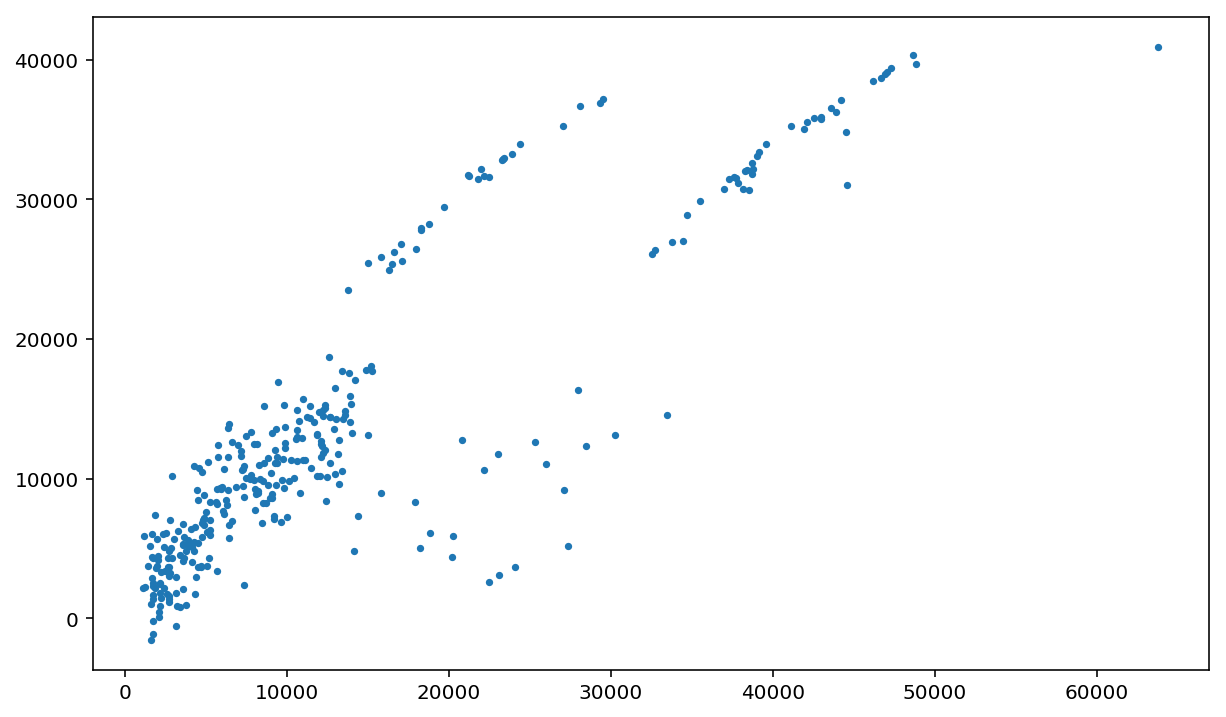

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions, s = 7)

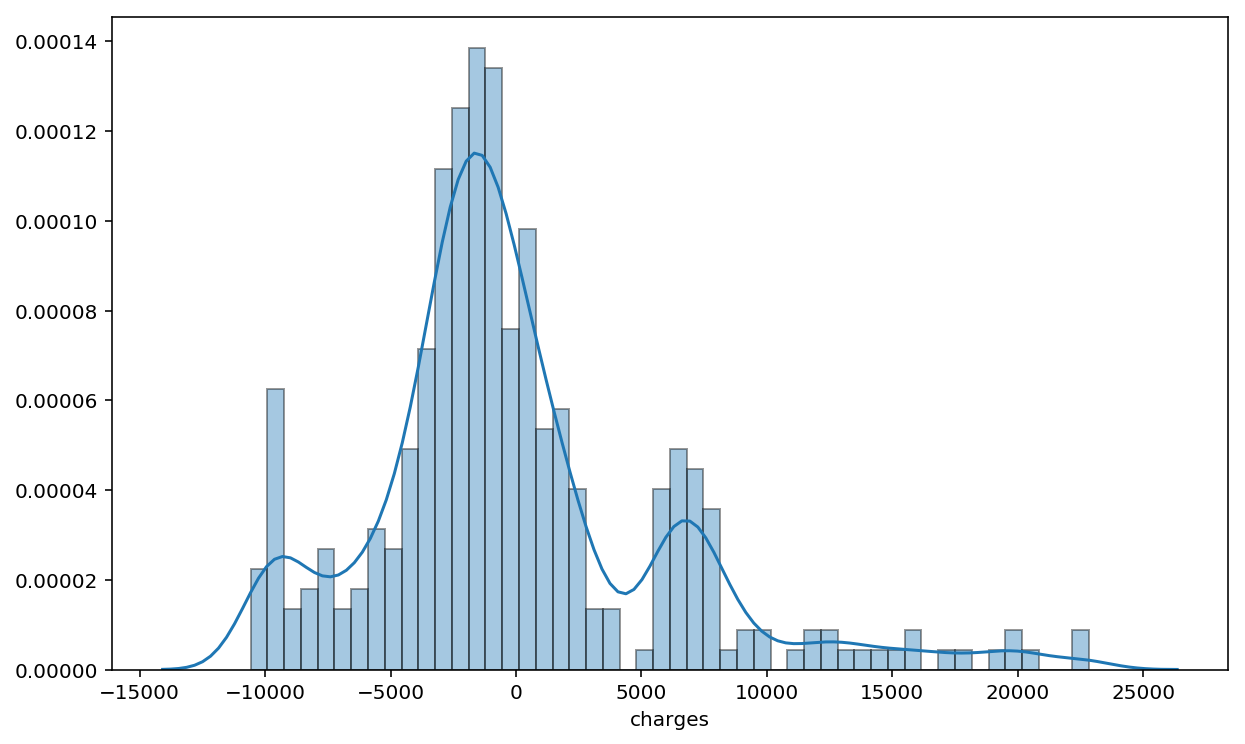

In [61]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions),bins=50);

In [62]:
rf.feature_importances_

array([0.13710736, 0.00643979, 0.20949374, 0.02024304, 0.01361777,
       0.6130983 ])

Text(0,0.5,'Feature Importance Score')

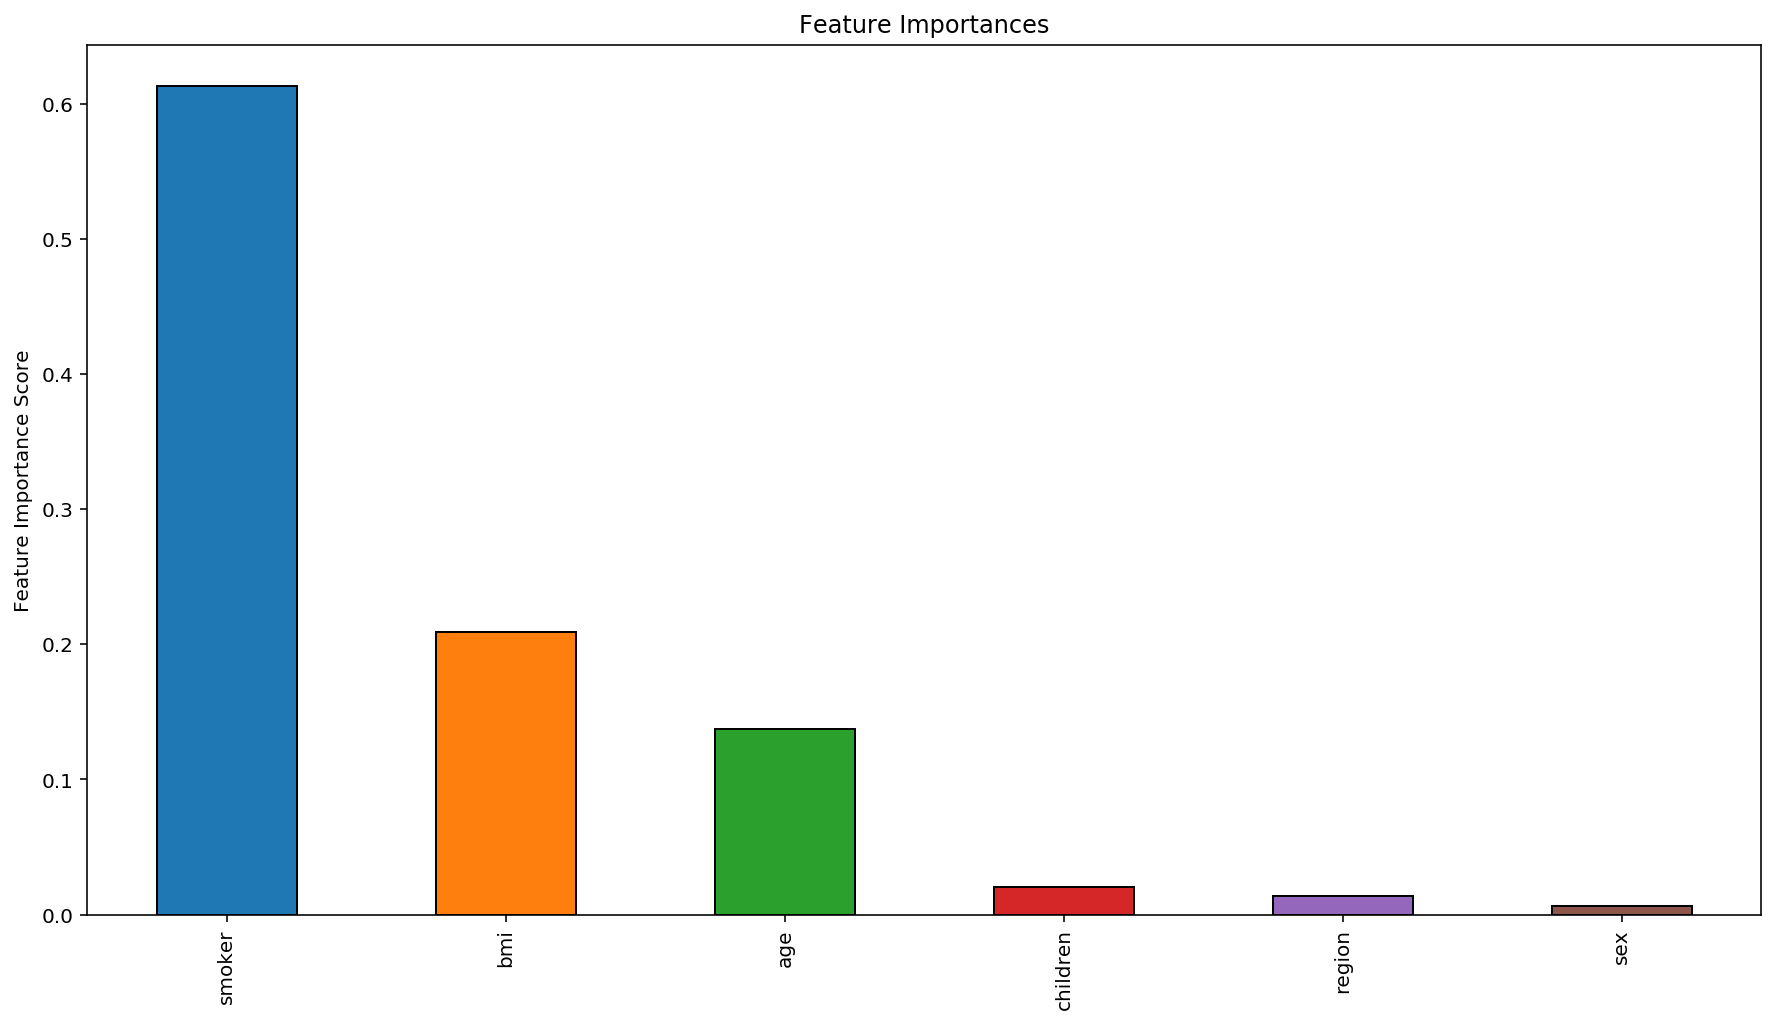

In [63]:
feat_imp = pd.Series(rf.feature_importances_,X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize = (15,8))
plt.ylabel('Feature Importance Score')